## Convolutional Networks + Dense applied in radio records using Spectrograms

    Authors: Fernanda Ferreira and Victor Paganotto
    Professor: Tiago F. Tavares
    
    date: Feb/2019

## Import Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import glob
import librosa
import librosa.display as ld
# Printa todos os valores do array
#np.set_printoptions(threshold=np.inf)
np.set_printoptions(threshold=10)
import pandas as pd
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
import keras
import os
import re

/home/fernanda/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## To load records

In [2]:
#data = glob.glob('1seg/test/*.mp3')
data = glob.glob('2seg/fold1/*.mp3')
#data = glob.glob('../../Projeto_phd/academia/*.wav')

In [3]:
len_audios = []
audios = []

for file in data[0:1]:
    audio, sr = librosa.core.load(file, sr=None, mono=True, offset=0.0, duration=None)
    len_audios.append(len(audio))
    audios.append(audio)
    max_audio = max(len_audios)

In [ ]:
#print (data[0:100])
#print (len_audios)   
#print (max(len_audios))
#print (np.argmax(len_audios))
#print (sr)
#print (len(audios))
#print (max_audio)
#print (audios[0].shape)

#labels = open('propagandas/labels_1seg.txt', 'r')
#print ('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
#labels

In [4]:
hop_length = 400
n_fft = 500

#To convert the hop length and frame size to units of seconds:
print ("hop length[s]:", float(hop_length)/sr) # units of seconds
print ("frame size[s]:",float(n_fft)/sr) # units of seconds

audios_resize = []
specs = []

for i in range(len(audios)):
    shape = (max(len_audios))
    i_audio = np.array(audios[i])
    i_audio.resize(shape)
    x = librosa.stft(i_audio, n_fft=n_fft, hop_length=hop_length)
    X = librosa.amplitude_to_db(np.abs(x), ref=np.max)
    specs.append(X)
    audios_resize.append(i_audio)

#Librosa.stft return:
#np.ndarray [shape=(1 + n_fft/2, t), dtype=dtype]

hop length[s]: 0.009070294784580499
frame size[s]: 0.011337868480725623


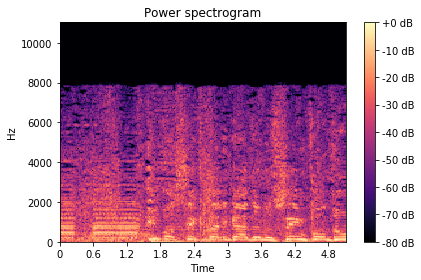

In [5]:
#plt.figure(figsize=(20,15))
#plt.imshow(specs[30])

ld.specshow(specs[0],y_axis='linear', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

In [28]:
print (specs[0].shape)
#print (len(specs))
#print (type(specs))
specs = np.array(specs)
#print (type(specs))

#print (specs[0])

(251, 111)


## To load Labels

In [18]:
l = []
for file in data:
    (dirname, sname) = os.path.split(file)
    (name, ext) = os.path.splitext(sname)
    n = re.split('-', name, flags=re.IGNORECASE)
    n2 = re.split('[0-9]+', n[0])
    #print (n[0])]
    #print (n2[1])
    l.append(n2[1])

In [39]:
#l_np = np.array(l)
#print (l_np)

In [20]:
# Need not be sorted, necessarily
#a = (0, 1, 1, 1, 2, 3, 7, 7, 23)

def count_elements(seq) -> dict:
    """Tally elements from `seq`."""
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    return hist

#counted = count_elements(a)
#counted

l_count = count_elements(l)
l_count

{'NP': 30, 'P': 30}

## To separate 80% to train and 20% to test

In [21]:
#stratify: certifica a mesma quantidade de audios de cada classe.
x_train1, x_test, y_train1, y_test = train_test_split(specs, l, test_size=0.2, random_state=42, stratify=l)
x_train, x_val, y_train, y_val = train_test_split(x_train1, y_train1, test_size=0.2, random_state=42, stratify=y_train1)

#print (type(x_train))

In [ ]:
#y_train_count = count_elements(y_train_bi)
#print (y_train_count)
#y_test_count = count_elements(y_test_bi)
#print (y_test_count)

#print (type(y_train[0]))

## Transform labels in binary

In [22]:
#print (type(y_train))
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)
x_train_np = np.array(x_train)
x_test_np = np.array(x_test)
y_val_np = np.array(y_val)
x_val_np = np.array(x_val)
#print (y_train_np)

# convert class vectors to binary class matrices
def string_to_binary(lista):
    
    for i in range(len(lista)):
        if lista[i] == 'P':
            lista[i] = 0
        elif lista[i] == 'NP':
            lista[i] = 1
    return lista


In [24]:
y_train_bi = string_to_binary(y_train_np)
print (y_train_bi)

y_test_bi = string_to_binary(y_test_np)
print (y_test_bi)

y_val_bi = string_to_binary(y_val_np)
print (y_val_bi)

print (x_val_np.shape)
print (x_train_np.shape)
print (x_test_np.shape)

['0' '1' '1' ... '1' '0' '1']
['1' '0' '0' ... '1' '0' '1']
(48, 251, 111)
(12, 251, 111)


# Conv2D + Maxpooling + Dense building

In [29]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv1D
from keras import backend as K

# Versão2

In [30]:
print (x_train_np.shape)
print (x_test_np.shape)
print (y_train_np.shape)
print (y_test_np.shape)

(48, 251, 111)
(12, 251, 111)
(48,)
(12,)


In [31]:
# input image dimensions
img_rows = x_train_np.shape[1]
img_cols = x_train_np.shape[2]

if K.image_data_format() == 'channels_first':
    x_train_np = x_train_np.reshape(x_train_np.shape[0], 1, img_rows, img_cols)
    x_val_np = x_val_np.reshape(x_val_np.shape[0], 1, img_rows, img_cols)
    x_test_np = x_test_np.reshape(x_test_np.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train_np = x_train_np.reshape(x_train_np.shape[0], img_rows, img_cols, 1)
    x_val_np = x_val_np.reshape(x_val_np.shape[0], img_rows, img_cols, 1)
    x_test_np = x_test_np.reshape(x_test_np.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train_np = x_train_np.astype('float32')
x_val_np = x_val_np.astype('float32')
x_test_np = x_test_np.astype('float32')
x_train_np /= 255
x_val_np /= 255
x_test_np /= 255
print('x_train shape:', x_train_np.shape)
print(x_train_np.shape[0], 'train samples')
print(x_val_np.shape[0], 'val samples')
print(x_test_np.shape[0], 'test samples')
print (input_shape)

print ('y_train shape:', y_train_np.shape)

num_classes = 2
y_train_np = keras.utils.to_categorical(y_train_bi, num_classes)
y_test_np = keras.utils.to_categorical(y_test_bi, num_classes)
y_val_np = keras.utils.to_categorical(y_val_bi, num_classes)

print ('y_train shape:', y_train_np.shape)

x_train shape: (48, 251, 111, 1)
48 train samples
12 test samples
(251, 111, 1)
y_train shape: (48,)
y_train shape: (48, 2)


In [32]:
batch_size = 20
epochs = 50

In [33]:
model = Sequential()
# Input Layer
input_shape=input_shape
# Hidden Layer
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
# Output Layer
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 249, 109, 16)      160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 124, 54, 16)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 122, 52, 16)       2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 61, 26, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 59, 24, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 29, 12, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 10, 16)        2320      
__________

In [34]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [35]:
#model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.compile(loss='categorical_crossentropy', metrics=[f1], optimizer='adam')
#model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

In [36]:
history = model.fit(x_train_np, y_train_np,
                    batch_size=batch_size, epochs=epochs, verbose=1,
                    validation_data=(x_val_np, y_val_np), callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=0, mode='auto')])


Train on 48 samples, validate on 12 samples
Epoch 1/50
48/48 [==============================] - 17s 354ms/step - loss: 0.7008 - acc: 0.4583 - val_loss: 0.6936 - val_acc: 0.5000
Epoch 2/50
48/48 [==============================] - 0s 4ms/step - loss: 0.6940 - acc: 0.5208 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 3/50
48/48 [==============================] - 0s 4ms/step - loss: 0.6930 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/50
48/48 [==============================] - 0s 4ms/step - loss: 0.6925 - acc: 0.5208 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 5/50
48/48 [==============================] - 0s 3ms/step - loss: 0.6925 - acc: 0.5000 - val_loss: 0.6935 - val_acc: 0.5000
Epoch 6/50
48/48 [==============================] - 0s 3ms/step - loss: 0.6914 - acc: 0.6042 - val_loss: 0.6937 - val_acc: 0.5000
Epoch 7/50
48/48 [==============================] - 0s 4ms/step - loss: 0.6919 - acc: 0.5000 - val_loss: 0.6942 - val_acc: 0.5000
Epoch 8/50
48/48 [=========================

In [37]:
score = model.evaluate(x_test_np, y_test_np, verbose=0)
print('Test loss:', score[0])
print('Test F1:', score[1])



Test loss: 0.6946070194244385
Test accuracy: 0.5


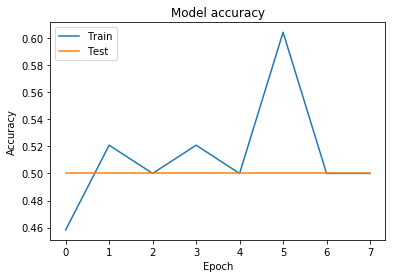

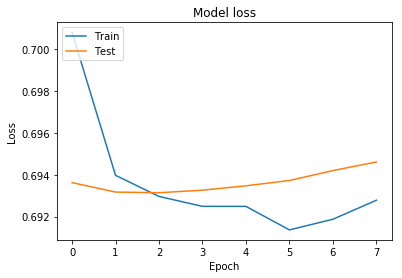

In [38]:
# Plot training & validation accuracy values
plt.plot(history.history['F1'])
plt.plot(history.history['val_F1'])
plt.title('Model F1-score')
plt.ylabel('F1-score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## References

- https://stackoverflow.com/questions/43906048/keras-early-stopping
- https://keras.io/callbacks/